In [3]:
%load_ext autoreload
%autoreload 2

import pandas as pd
pd.set_option('display.max_rows', 500)

from cataclop.ml.pipeline.balphagore import Balphagore

2021-11-01 02:32:47.392351: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-11-01 02:32:47.392629: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [259]:
def reco_mysql():
    from django.db import connections, connection
    for conn in connections.all():
        conn.close_if_unusable_or_obsolete()

In [16]:
balphagore = Balphagore()
balphagore.load_dataset(filters={'start_at__date__gte':'2019-01-01', 'start_at__date__lte':'2019-12-31'})

13139 races


In [17]:
balphagore.train()

126562 train samples, 32523 validation samples


Epoch 1/5
1624/1624 [==============================] - 9s 5ms/step - loss: 0.3851
Epoch 2/5
1624/1624 [==============================] - 8s 5ms/step - loss: 0.2864
Epoch 3/5
1624/1624 [==============================] - 8s 5ms/step - loss: 0.2842
Epoch 4/5
1624/1624 [==============================] - 9s 5ms/step - loss: 0.2712
Epoch 5/5
1978/1978 [==============================] - 8s 4ms/step
Epoch 1/5
1624/1624 [==============================] - 13s 7ms/step - loss: 0.3663
Epoch 2/5
1624/1624 [==============================] - 10s 6ms/step - loss: 0.2891
Epoch 3/5
1624/1624 [==============================] - 14s 9ms/step - loss: 0.2791
Epoch 4/5
1624/1624 [==============================] - 9s 6ms/step - loss: 0.2770
Epoch 5/5
1978/1978 [==============================] - 7s 3ms/step


In [18]:
balphagore.debug_race(balphagore.df_train)

position          sub_category  num  \
race_id                                               
77008   794          2.0              HANDICAP    1   
        804          3.0              HANDICAP   11   
        803          4.0              HANDICAP   10   
        802          8.0              HANDICAP    9   
        801          6.0              HANDICAP    8   
        800         11.0              HANDICAP    7   
        799          5.0              HANDICAP    6   
        798          9.0              HANDICAP    5   
        797          1.0              HANDICAP    4   
        796          7.0              HANDICAP    3   
        795         10.0              HANDICAP    2   
79285   28347       10.0   COURSE_A_CONDITIONS   15   
        28333        5.0   COURSE_A_CONDITIONS    1   
        28348       12.0   COURSE_A_CONDITIONS   16   
        28335        NaN   COURSE_A_CONDITIONS    3   
        28346        3.0   COURSE_A_CONDITIONS   14   
        28345       14.0   COURSE_A_CONDITIONS   13   
        28344        NaN   COURSE_A_CONDITIONS   12   
        28343        8.0   COURSE_A_CONDITIONS   11   
        28334        7.0   COURSE_A_CONDITIONS    2   
        28341       13.0   COURSE_A_CONDITIONS    9   
        28340        9.0   COURSE_A_CONDITIONS    8   
        28339        6.0   COURSE_A_CONDITIONS    7   
        28338        4.0   COURSE_A_CONDITIONS    6   
        28337        1.0   COURSE_A_CONDITIONS    5   
        28336       11.0   COURSE_A_CONDITIONS    4   
        28342        2.0   COURSE_A_CONDITIONS   10   
79632   32419        2.0               INCONNU    9   
        32418        4.0               INCONNU    8   
        32411        1.0               INCONNU    1   
        32413        6.0               INCONNU    3   
        32414        5.0               INCONNU    4   
        32415        NaN               INCONNU    5   
        32416        3.0               INCONNU    6   
        32412        NaN               INCONNU    2   
        32424        7.0               INCONNU   14   
        32423       10.0               INCONNU   13   
        32422        NaN               INCONNU   12   
        32421        8.0               INCONNU   11   
        32417        9.0               INCONNU    7   
        32420        NaN               INCONNU   10   
80167   38755        NaN  EUROPEENNE_AUTOSTART    3   
        38764        NaN  EUROPEENNE_AUTOSTART   12   
        38763        3.0  EUROPEENNE_AUTOSTART   11   
        38762        NaN  EUROPEENNE_AUTOSTART   10   
        38761        9.0  EUROPEENNE_AUTOSTART    9   
        38758        4.0  EUROPEENNE_AUTOSTART    6   
        38759        7.0  EUROPEENNE_AUTOSTART    7   
        38757        1.0  EUROPEENNE_AUTOSTART    5   
        38756        8.0  EUROPEENNE_AUTOSTART    4   
        38765        NaN  EUROPEENNE_AUTOSTART   13   
        38760        NaN  EUROPEENNE_AUTOSTART    8   
        38766        2.0  EUROPEENNE_AUTOSTART   14   
        38753        5.0  EUROPEENNE_AUTOSTART    1   
        38768        NaN  EUROPEENNE_AUTOSTART   16   
        38769        NaN  EUROPEENNE_AUTOSTART   17   
        38770        NaN  EUROPEENNE_AUTOSTART   18   
        38754        6.0  EUROPEENNE_AUTOSTART    2   
        38767       10.0  EUROPEENNE_AUTOSTART   15   
81114   49925        1.0   COURSE_A_CONDITIONS    1   
        49927        5.0   COURSE_A_CONDITIONS    3   
        49928        4.0   COURSE_A_CONDITIONS    4   
        49929        2.0   COURSE_A_CONDITIONS    5   
        49933        6.0   COURSE_A_CONDITIONS    9   
        49932        8.0   COURSE_A_CONDITIONS    8   
        49931        3.0   COURSE_A_CONDITIONS    7   
        49930        9.0   COURSE_A_CONDITIONS    6   
        49926        7.0   COURSE_A_CONDITIONS    2   
81791   57921        1.0   COURSE_A_CONDITIONS    1   
        57922        7.0   COURSE_A_CONDITIONS    2   
        57923        5.0   COURSE_A_CONDITIONS    3   
 

In [69]:
balphagore.bet(balphagore.df_train, max_races=10000)

10070it [19:00,  8.83it/s]                                                                                                                                                                       


In [70]:
for strat in range(8):
    print(strat+1)
    balphagore.bets[balphagore.bets['strategy']==strat+1].filter(regex='^top', axis=1).mean()

,top1_correct,top1_in_3_correct,top2_correct,top2_correct_disorder,top3_correct,top3_correct_disorder,top4_correct,top4_correct_disorder,top2_in_4_correct
count,79998.000000,79998.000000,79998.000000,79998.000000,79998.000000,79998.000000,79998.000000,79998.000000,79998.000000
mean,0.096440,0.280382,0.013913,0.026988,0.002338,0.013100,0.000463,0.011163,0.124491
std,0.295195,0.449189,0.117130,0.162050,0.048292,0.113705,0.021501,0.105063,0.330142
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [71]:
reco_mysql()
balphagore.compute_profit()

  0%|                                                                                                                                                                  | 0/79998 [00:00<?, ?it/s]/opt/pysetup/.venv/lib/python3.7/site-packages/numpy/core/numeric.py:2378: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return bool(asarray(a1 == a2).all())
100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 79998/79998 [26:15<00:00, 50.78it/s]


In [135]:
b = balphagore.bets
b = b[(b['sub_category']=='NATIONALE') & (b['final_odds_ref'] > 10) & (b['final_odds_ref'] < 30)].copy()
b.reset_index(inplace=True, drop=True)

In [136]:
print(balphagore.bets['race_id'].nunique())
for strat in range(8):
    print(strat+1)
    print(b[b['strategy']==strat+1].filter(regex='^profit_', axis=1).mean())

10000
1
profit_win                     -0.484270
profit_placed                  -0.529213
profit_top2_correct             0.000000
profit_top2_correct_disorder   -0.738202
profit_top3_correct             0.000000
profit_top3_correct_disorder   -0.179775
profit_top4_correct            -0.011236
profit_top4_correct_disorder   -0.640449
profit_top2_in_4_correct       -0.412360
dtype: float64
2
profit_win                     -0.606250
profit_placed                  -0.383929
profit_top2_correct             0.000000
profit_top2_correct_disorder   -0.682143
profit_top3_correct            -0.017857
profit_top3_correct_disorder   -0.937500
profit_top4_correct            -0.044643
profit_top4_correct_disorder   -0.517857
profit_top2_in_4_correct       -0.453571
dtype: float64
3
profit_win                     -0.541216
profit_placed                  -0.187162
profit_top2_correct             0.000000
profit_top2_correct_disorder   -0.972973
profit_top3_correct            -0.020270
profit_top3_cor

In [168]:
profit_cols = [col for col in balphagore.bets.columns if col.startswith('profit_')]

In [241]:
def unpack_bet_odds(b):
    import json
    import numpy as np
    def to_b_odds_n(n):
        def to_b_odds(r):
            odds = json.loads(r)
            return odds[n] if len(odds) > n else np.nan
        return to_b_odds

    b['b_odds_1'] = b['odds'].apply(to_b_odds_n(0))
    b['b_odds_2'] = b['odds'].apply(to_b_odds_n(1))
    b['b_odds_3'] = b['odds'].apply(to_b_odds_n(2))
    b['b_odds_mean2'] = b[['b_odds_1', 'b_odds_2']].mean(axis=1)
    b['b_odds_std2'] = b[['b_odds_1', 'b_odds_2']].std(axis=1)
    b['b_odds_mean3'] = b[['b_odds_1', 'b_odds_2', 'b_odds_3']].mean(axis=1)
    b['b_odds_std3'] = b[['b_odds_1', 'b_odds_2', 'b_odds_3']].std(axis=1)
    


In [238]:
balphagore.bets['b_odds_std'] = balphagore.bets[['b_odds_1', 'b_odds_2', 'b_odds_3']].std(axis=1)

In [240]:
balphagore.bets[['b_odds_std', 'b_odds_sum']]

,b_odds_std,b_odds_sum
0,7.159842,7.333333
1,6.539368,10.733333
2,8.265591,12.100000
3,74.143127,59.266667
4,90.759683,80.100000
...,...,...
79993,120.703493,82.666667
79994,208.285861,193.000000
79995,217.523179,184.666667
79996,52.983614,43.233333


In [242]:
unpack_bet_odds(balphagore.bets)

In [328]:
balphagore.bets.iloc[[0,2]]

,level_0,index,id,imported_at_player,race_id,age,num,music,is_racing,is_first_timer,...,profit_top2_in_4_correct,b_odds_1,b_odds_2,b_odds_3,b_odds_sum,b_odds_std,b_odds_mean2,b_odds_std2,b_odds_mean3,b_odds_std3
0,0,9,943606,2021-10-26 06:18:43.631120,76945,7,10,2m6m2m3m(18)1m9a6mDm,True,False,...,-1.0,3.1,15.6,3.3,7.333333,7.159842,9.35,8.838835,7.333333,7.159842
2,0,11,943608,2021-10-20 22:28:33.946830,76945,6,12,4mDm2m7m(18)7m0a1m6m2m,True,False,...,-1.0,3.3,13.3,19.7,12.100000,8.265591,8.30,7.071068,12.100000,8.265591


COURSE_A_CONDITIONS
1


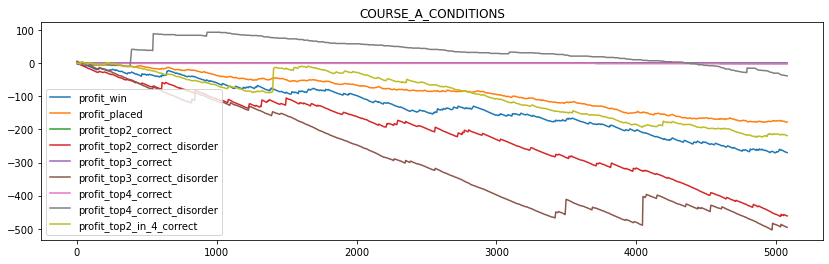

2


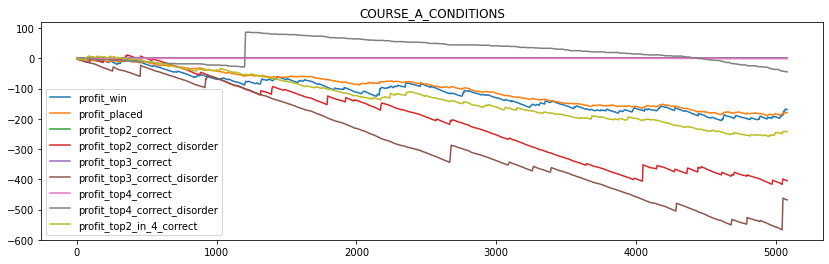

3


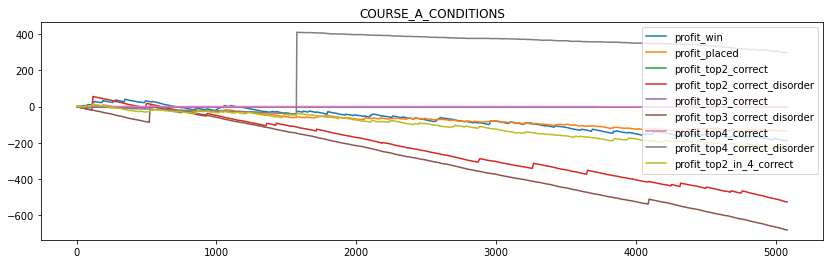

4


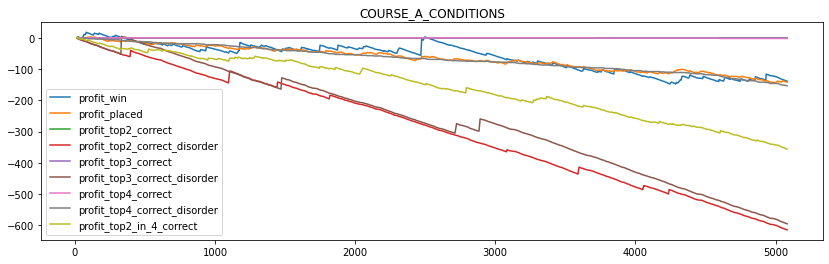

5


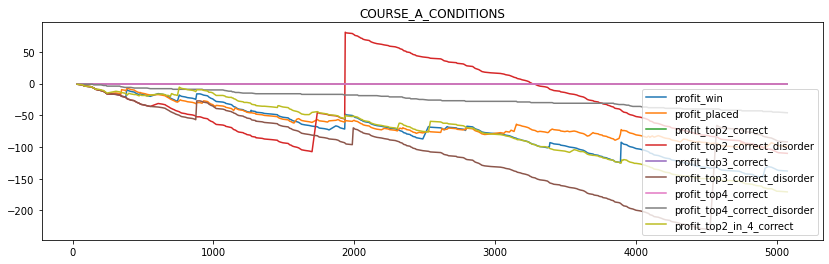

6


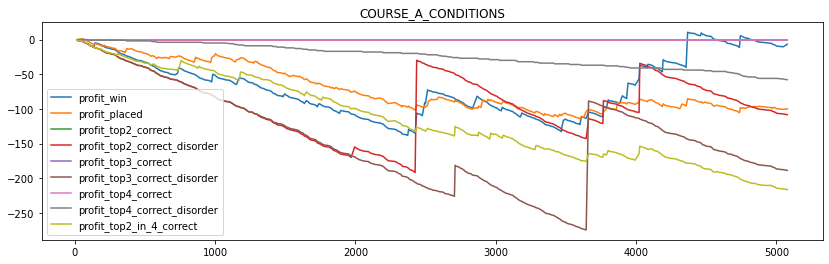

7


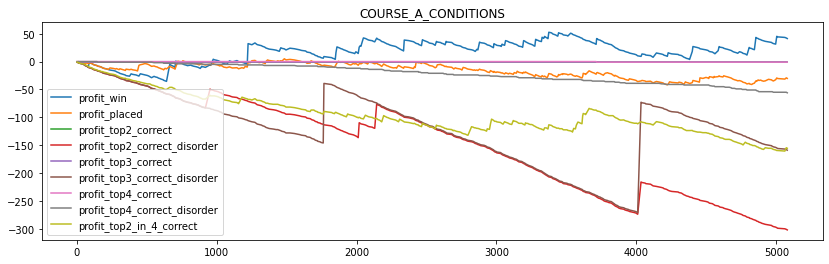

8


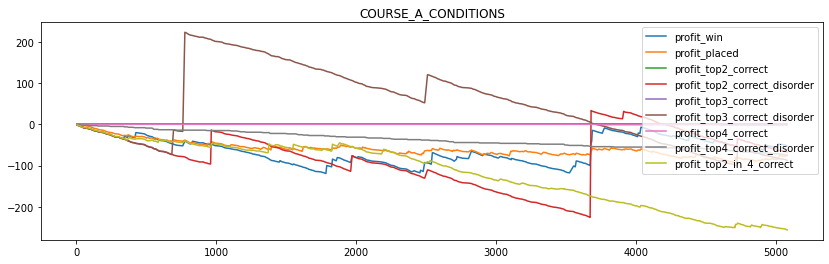

INCONNU
1


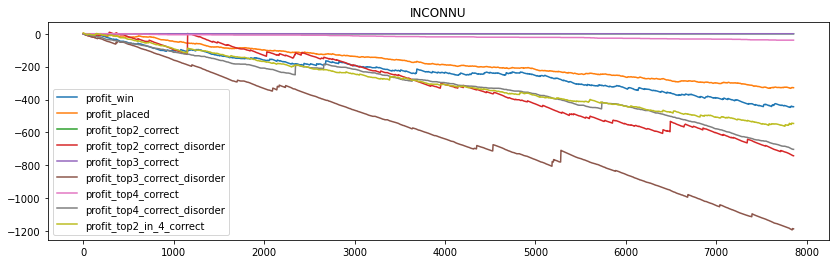

2


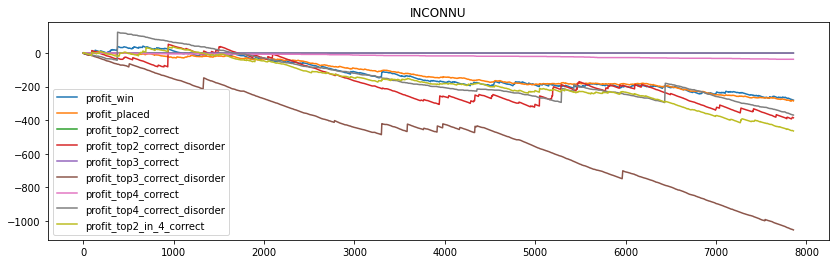

3


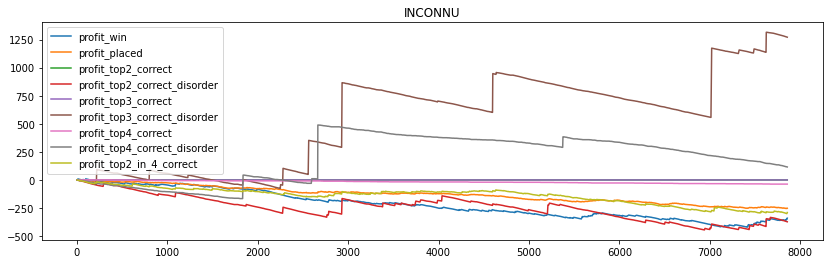

4


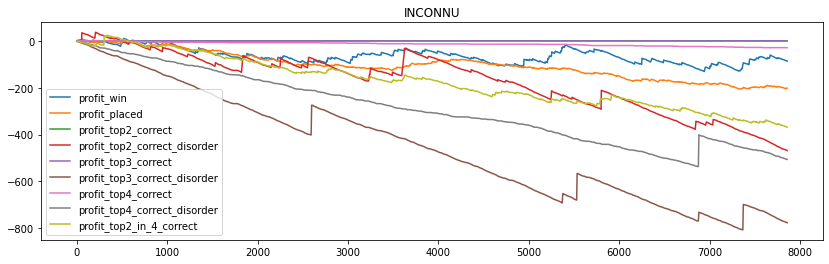

5


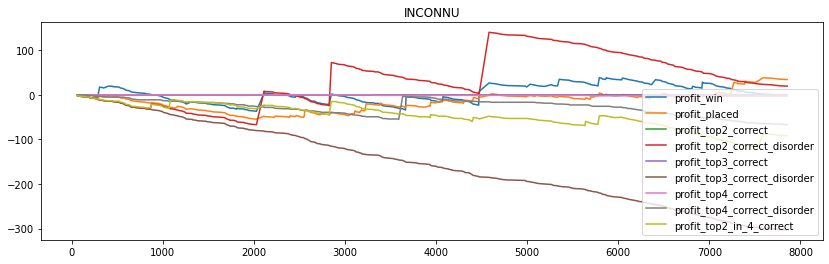

6


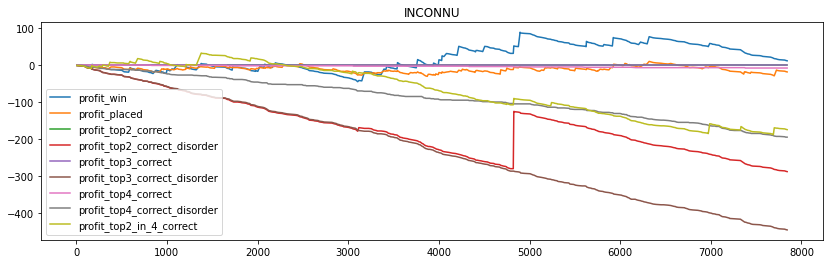

7


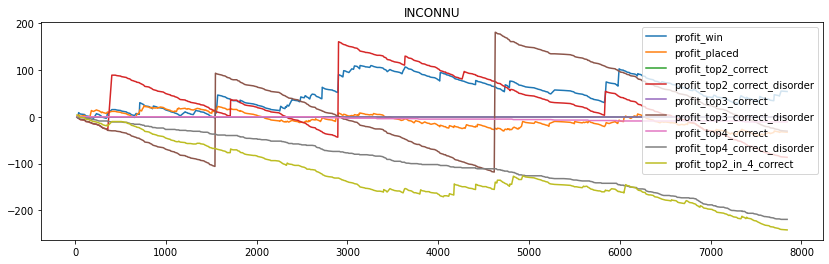

8


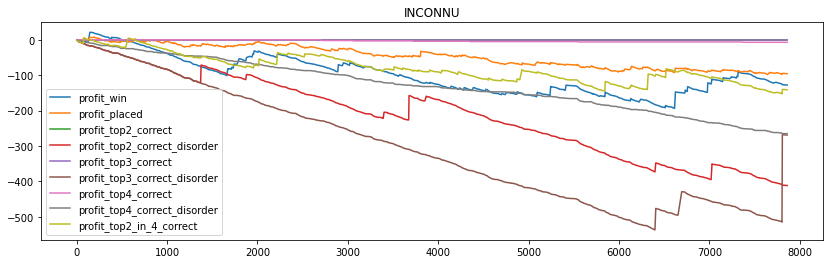

AUTOSTART
1


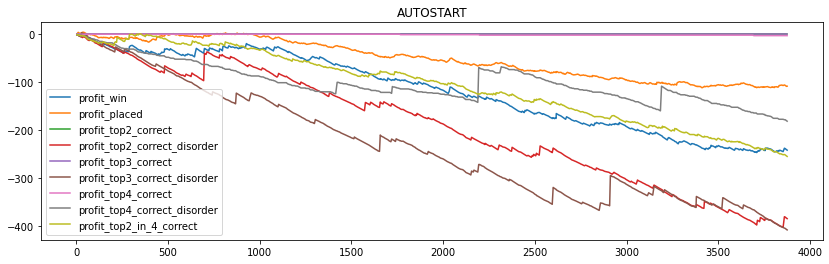

2


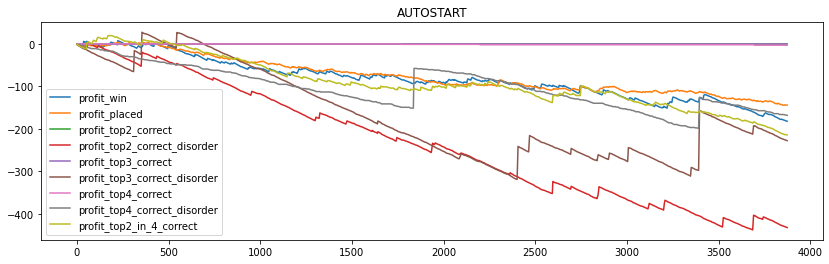

3


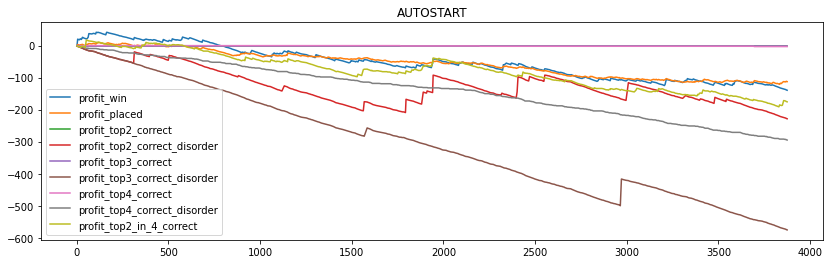

4


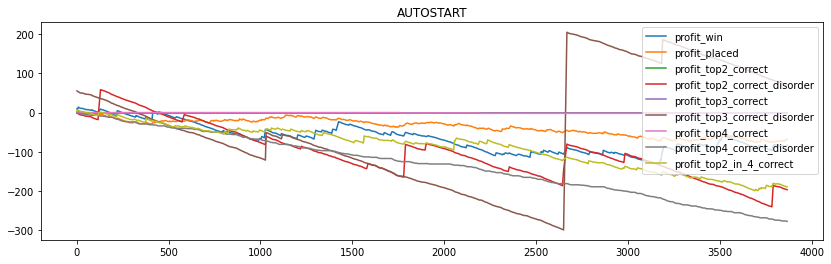

5


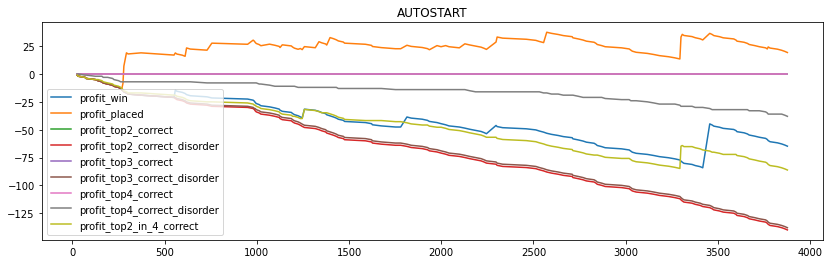

6


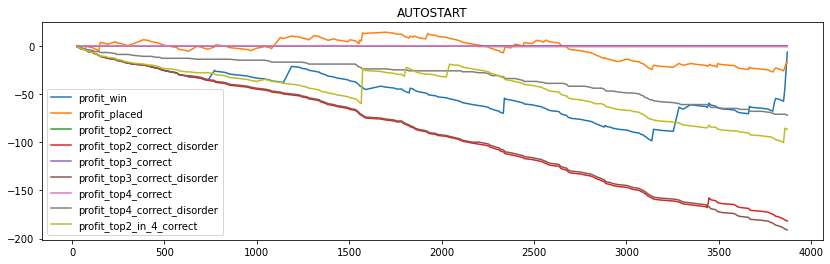

7


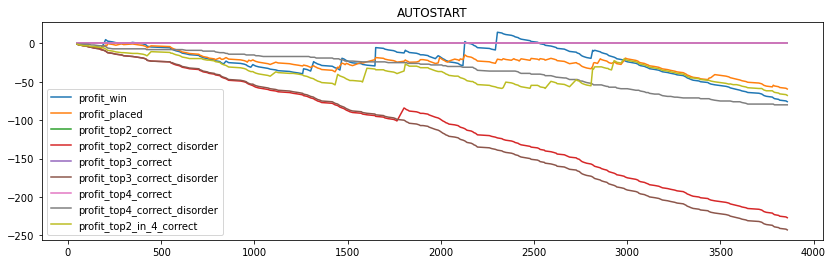

8


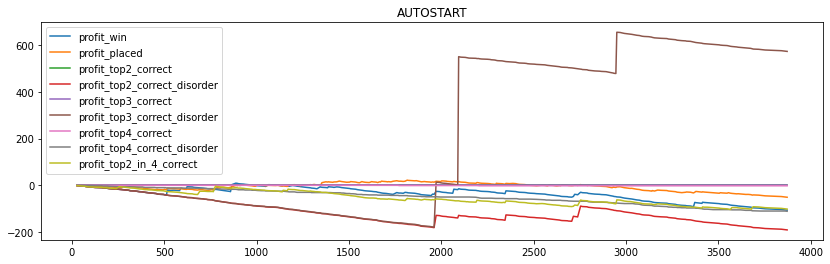

HANDICAP
1


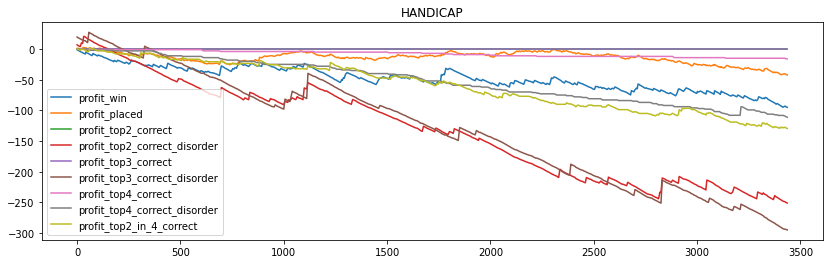

2


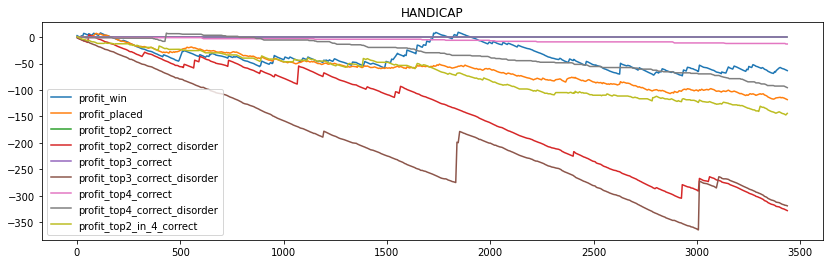

3


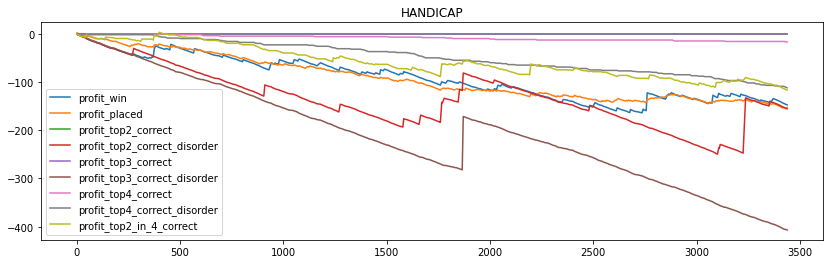

4


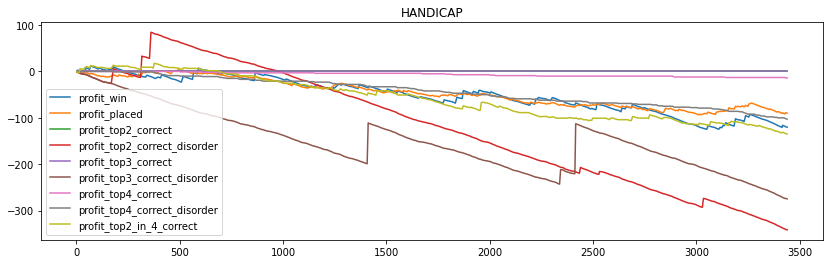

5


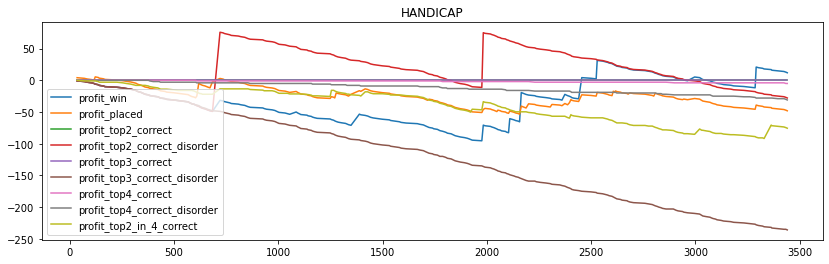

6


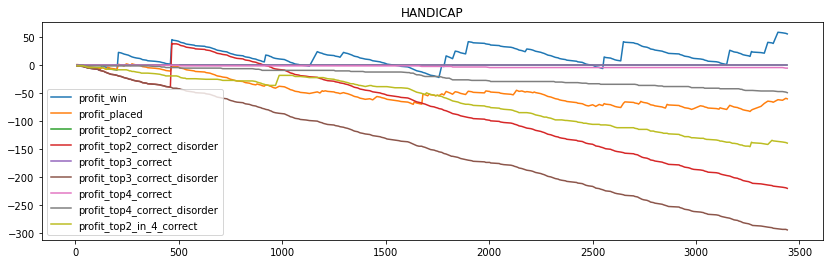

7


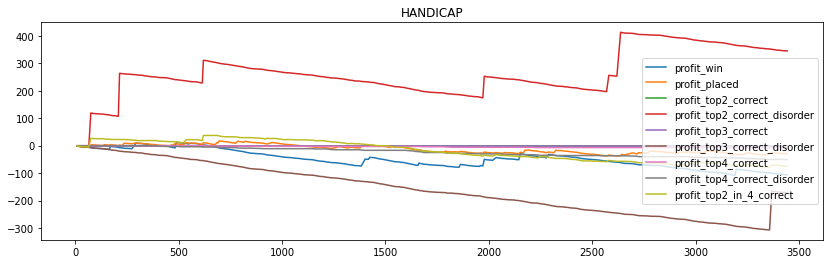

8


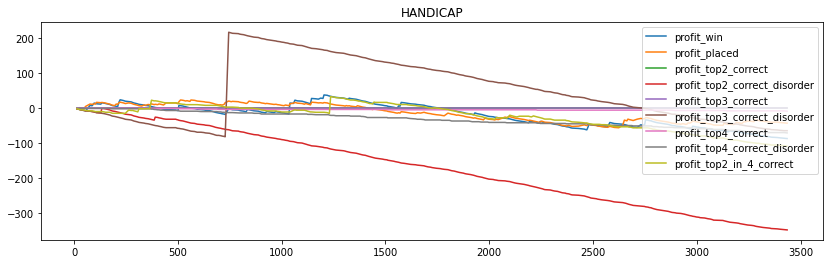

HANDICAP_DIVISE
1


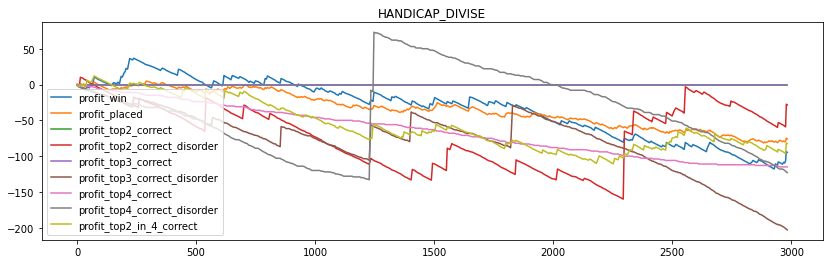

2


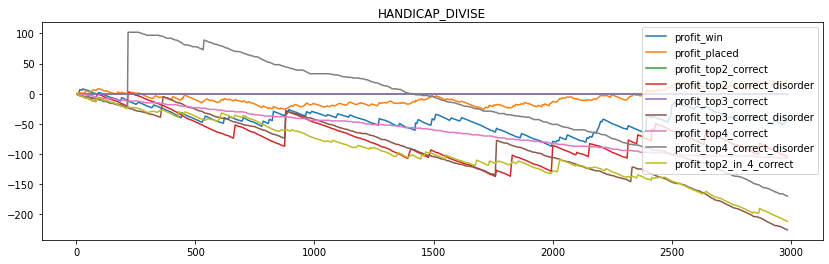

3


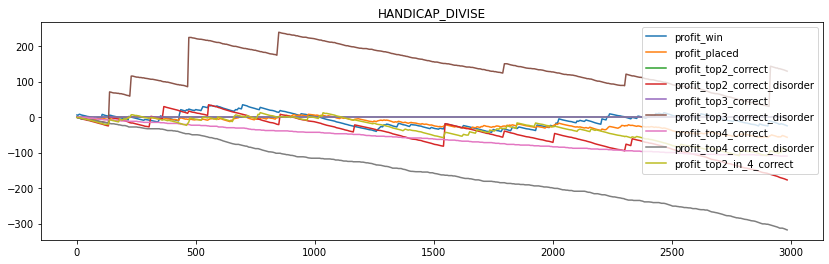

4


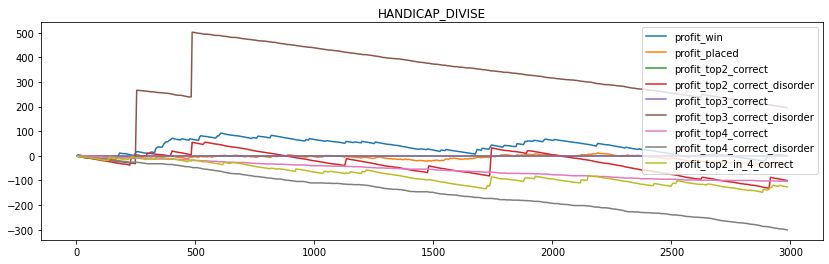

5


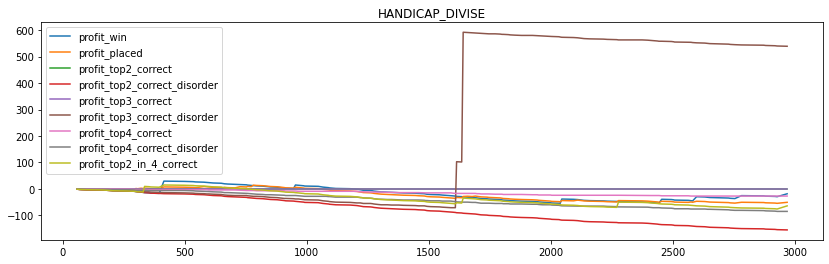

6


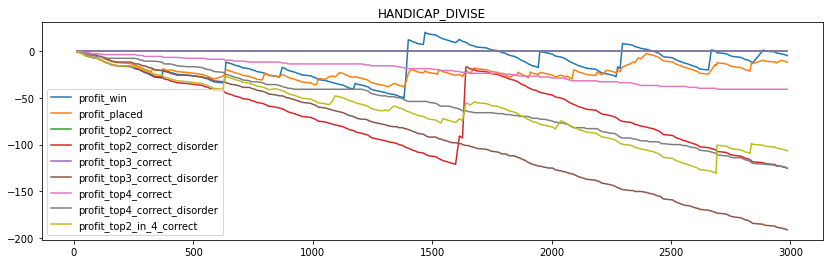

7


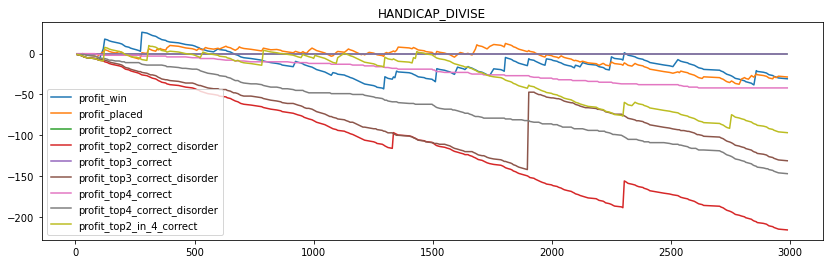

8


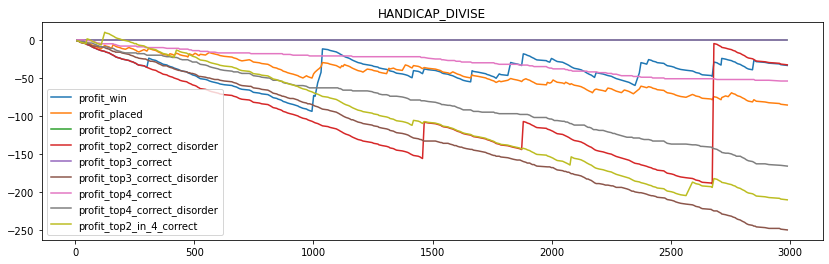

In [322]:
from matplotlib import pyplot as plt
for subcat in balphagore.bets.sub_category.value_counts().index[:5]:
    print(subcat)
    b = balphagore.bets
    b = b[(b['sub_category']==subcat) & (b['b_odds_1']<20) & (b['declared_player_count']>=10)].copy()
    b.reset_index(inplace=True, drop=True)
    for strat in range(8):
        print(strat+1)
        for col in profit_cols:
            b[b['strategy']==strat+1][col].cumsum().plot(title=subcat, legend=True, figsize=(14,4))
        plt.show()

profit_win                     -0.306971
profit_placed                  -0.022596
profit_top2_correct             0.000000
profit_top2_correct_disorder   -0.104567
profit_top3_correct            -0.069471
profit_top3_correct_disorder    2.364904
profit_top4_correct             0.000000
profit_top4_correct_disorder    0.000000
profit_top2_in_4_correct       -0.080048
dtype: float64

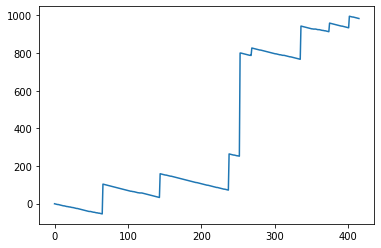

In [257]:
subcat = 'AUTOSTART'
col = 'profit_top3_correct_disorder'
strat = 7

b = balphagore.bets
b = b[(b['sub_category']==subcat) & (b['final_odds'] < 30) & ((b['strategy']==strat+1)) & (b['declared_player_count']<14)].copy()
b.reset_index(inplace=True, drop=True)
b[col].cumsum().plot()
b[profit_cols].mean()

profit_win                     -0.020000
profit_placed                  -0.030588
profit_top2_correct             0.000000
profit_top2_correct_disorder   -0.031176
profit_top3_correct             0.018235
profit_top3_correct_disorder    5.084706
profit_top4_correct            -0.005882
profit_top4_correct_disorder   -0.182353
profit_top2_in_4_correct        0.022353
dtype: float64

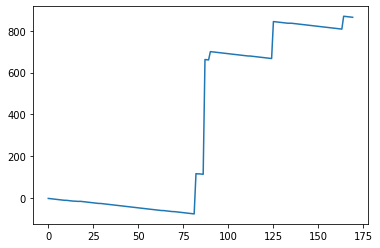

In [256]:
subcat = 'AUTOSTART'
col = 'profit_top3_correct_disorder'
strat = 7

b = balphagore.bets
b = b[(b['sub_category']==subcat) & (b['b_odds_mean3'] < 20) & (b['b_odds_mean3'] > b['b_odds_mean2']) & ((b['strategy']==strat+1)) & (b['declared_player_count']<20)].copy()
b.reset_index(inplace=True, drop=True)
b[col].cumsum().plot()
b[profit_cols].mean()

profit_win                      0.221811
profit_placed                   0.233333
profit_top2_correct             0.000000
profit_top2_correct_disorder   -1.000000
profit_top3_correct             0.000000
profit_top3_correct_disorder   -0.954733
profit_top4_correct            -0.045267
profit_top4_correct_disorder   -0.337449
profit_top2_in_4_correct       -0.399177
dtype: float64

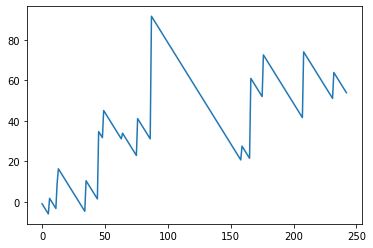

In [291]:
subcat = 'HANDICAP'
col = 'profit_win'
strat = 7

b = balphagore.bets
b = b[(b['sub_category']==subcat) & (b['b_odds_mean3'] > 20) & ((b['strategy']==strat+1))].copy()
b.reset_index(inplace=True, drop=True)
b[col].cumsum().plot()
b[profit_cols].mean()

In [236]:
cols = ['profit_top3_correct_disorder']
b[b['profit_top3_correct_disorder']>0][['race_id', 'start_at', 'b_odds_sum', 'b_odds_1', 'b_odds_2', 'b_odds_3', 'odds_1', 'odds_2', 'odds_3', 'combo', 'combo_real', 'odds'] + cols]

,race_id,start_at,b_odds_sum,b_odds_1,b_odds_2,b_odds_3,odds_1,odds_2,odds_3,combo,combo_real,odds,profit_top3_correct_disorder
42,78561,2019-05-05 11:10:00,10.066667,5.5,19.0,5.7,5.5,5.7,6.9,"[3, 5, 7, 9, 1]","[7, 5, 3]","[5.5, 19.0, 5.7, 32.0, 6.9]",158.4
61,79311,2019-05-25 15:54:00,13.966667,32.0,5.3,4.6,4.6,5.3,7.2,"[10, 5, 7, 2, 1]","[7, 5, 10]","[32.0, 5.3, 4.6, 7.2, 8.8]",151.2
162,82295,2019-08-09 19:50:00,12.666667,14.0,11.0,13.0,5.1,7.6,8.3,"[5, 11, 2, 10, 8]","[5, 11, 2]","[14.0, 11.0, 13.0, 8.8, 7.6]",192.3
173,82613,2019-08-17 22:25:00,8.033333,3.9,8.2,12.0,4.7,7.3,8.2,"[3, 8, 2, 9, 11]","[3, 8, 2]","[3.9, 8.2, 12.0, 8.8, 16.0]",548.3
184,82888,2019-08-25 11:40:00,5.000000,2.6,6.4,6.0,6.0,6.4,6.5,"[4, 6, 3, 7, 2]","[6, 3, 4]","[2.6, 6.4, 6.0, 29.0, 10.0]",39.8
243,84540,2019-10-10 17:02:00,10.833333,14.0,7.5,11.0,7.5,8.6,11.0,"[12, 2, 4, 8, 1]","[4, 12, 2]","[14.0, 7.5, 11.0, 70.0, 47.0]",176.6
282,85685,2019-11-10 11:05:00,11.333333,17.0,12.0,5.0,5.0,12.0,13.0,"[1, 4, 7, 8, 5]","[1, 7, 4]","[17.0, 12.0, 5.0, 21.0, 13.0]",45.8
310,86530,2019-12-03 21:30:00,7.666667,6.5,4.5,12.0,4.5,4.5,6.5,"[2, 6, 3, 7, 8]","[2, 3, 6]","[6.5, 4.5, 12.0, 4.5, 2.8]",61.4


In [237]:
np.std([5.5,19.0,5.7])


6.317348248188387

In [234]:
b[profit_cols].mean()

profit_win                     -0.240000
profit_placed                   0.057846
profit_top2_correct             0.000000
profit_top2_correct_disorder   -0.329231
profit_top3_correct            -0.085846
profit_top3_correct_disorder    3.377846
profit_top4_correct             0.000000
profit_top4_correct_disorder    0.000000
profit_top2_in_4_correct       -0.065846
dtype: float64

In [199]:
b['b_odds_1']

0      15.0
1      17.5
2      12.2
3      14.8
4      23.8
       ... 
645    23.0
646    22.0
647    17.0
648    42.0
649     9.4
Name: b_odds_1, Length: 650, dtype: float64

In [195]:
b['odds_1']

0      5.8
1      5.8
2      5.9
3      6.8
4      4.4
      ... 
645    3.6
646    8.3
647    3.6
648    4.2
649    5.8
Name: odds_1, Length: 650, dtype: float64

In [ ]:
balphagore.save_model()

In [260]:
reco_mysql()
balphagore2 = Balphagore()
balphagore2.load_dataset(filters={'start_at__date__gte':'2021-09-01', 'start_at__date__lte':'2021-10-01'})

1281 races


In [ ]:
balphagore2.load_model()


In [261]:
balphagore2.models = balphagore.models

In [262]:
balphagore2.predict(balphagore2.df)

454/454 [==============================] - 2s 4ms/step


In [263]:
balphagore2.debug_race()

position         sub_category  num                   music  \
race_id id                                                                    
111020  1348111       2.0            NATIONALE    8  0a0aDaDa(20)3a4aDa0a2a   
        1348107       NaN            NATIONALE    4    Da2aDa2a2a6a5aDa5a9a   
        1348106      10.0            NATIONALE    3      9a7a1a1a2a8aRa7aDa   
        1348105       6.0            NATIONALE    2    6a6a0aDaDa2a1a2aDa4a   
        1348104      12.0            NATIONALE    1    DaDa0a1a3aDa5a4a2aDa   
        1348110       8.0            NATIONALE    7          Da4a2a3a2a2a1a   
        1348112      11.0            NATIONALE    9            3a1aDa1a2a2a   
        1348113       9.0            NATIONALE   10        6a2aDa7a1a2a4a1a   
        1348114       5.0            NATIONALE   11    1a4a7a3a7a0a4a8a5a4a   
        1348115       NaN            NATIONALE   12  3a3a1a1a2a3a3a(20)3a9a   
        1348116       NaN            NATIONALE   13    Da4a1a6aDa3aDa7a2a7a   
        1348117       NaN            NATIONALE   14  6m6m2m(20)1mDm4m3m5m6a   
        1348118       4.0            NATIONALE   15    DaDaDa3a6a4a5aDa2a6a   
        1348119       1.0            NATIONALE   16    0a2a2a1a4a4a4a3a4a8a   
        1348108       7.0            NATIONALE    5  5a1aDaDa9a2a8a5a(20)9a   
        1348109       3.0            NATIONALE    6    3a0a5aDa0a3aDa3a4a3a   
111504  1353521      14.0              INCONNU    3  0aDa6a0a(20)5a5a7a3a8a   
        1353520       1.0              INCONNU    2  5a7a0a3a2a1a5a2a(20)9a   
        1353519       NaN              INCONNU    1    1a1a1a9a9aDaDaDaDa6a   
        1353535       2.0              INCONNU   17  6a1a2a1aDa2a1a2a(20)Da   
        1353536      10.0              INCONNU   18  2a9a0a5a3a6a0a8a(20)6a   
        1353533       4.0              INCONNU   15    4a2a4mDa1a5a2a5a3a4a   
        1353522      12.0              INCONNU    4    8a4a7a3a3a8a4aDa5a5a   
        1353532      13.0              INCONNU   14  9a9a3a2a1a7a(20)9a2a6a   
        1353531       6.0              INCONNU   13  7a3a2a2a2a0a1a(20)5a3a   
        1353529       7.0              INCONNU   11  1a3a8a4a1a3a4a4a(20)8a   
        1353528       9.0              INCONNU   10              1a2a1aDa1a   
        1353530       8.0              INCONNU   12    5a3a5a4a1a6a5a5a1a5a   
        1353526      16.0              INCONNU    8    0aDa7a7aDaDa3a0aDaDa   
        1353525       5.0              INCONNU    7  4a2a5a5a2a7a5a0a(20)5a   
        1353524      15.0              INCONNU    6    1a7m5aDa8a5aDaDa1aDm   
        1353523       3.0              INCONNU    5    6a8a7a6m2mDa5a5a3aDa   
        1353527      11.0              INCONNU    9    4aDa4aDaDaDa0a9a1a2a   
        1353534       NaN              INCONNU   16    9a2a2a3aDa1a3a2a7a7a   
111505  1353543       5.0            NATIONALE    7    DaDa3a3a3aDa4a6a6a3a   
        1353546      12.0            NATIONALE   10    5a7a5a0a0a7a3a5aDa1a   
        1353545      11.0            NATIONALE    9    2a2a8aRa(19)0a8a2a1a   
        1353544       8.0            NATIONALE    8    0a5a9aDa7a7a2aDa0a9a   
        1353547       NaN            NATIONALE   11    4a4a5a3a9a2a0a0a2a3a   
        1353541       NaN            NATIONALE    5    0aTaDm2a3a9a1aDa0a3a   
        1353540       6.0            NATIONALE    4  Aa2a2a3a7a8a4a(20)0a4a   
        1353539       7.0            NATIONALE    3    4aDa7a6aDa4a0a5a6a0a   
        1353542       4.0            NATIONALE    6    DaDa4aDa8a2aDaDa6a1a   
        1353548       3.0            NATIONALE   12  Da3a5a0a(20)5a9aDa0a4a   
        1353554       NaN            NATIONALE   18    Da4aDa7aDa1a1a0a8a7a   
        1353550       1.0            NATIONALE   14    1a1a3aDa1a2a3a3a4a4a   
        1353538       NaN            NATIONALE    2  Da7aDaDaDa(20)Da1a2a5a   
        1353549      10.0            NATIONALE   13    1a3a7a8a7a5a9a1aDa1a   
        1353552       9.0            NATIONALE   16    Da6aDaDa7a6a

In [264]:
balphagore2.bet(balphagore2.df)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1281/1281 [01:59<00:00, 10.76it/s]


In [265]:
balphagore2.compute_profit()

  0%|                                                                                                                                                         | 7/9880 [00:00<10:19, 15.93it/s]/opt/pysetup/.venv/lib/python3.7/site-packages/numpy/core/numeric.py:2378: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return bool(asarray(a1 == a2).all())
 11%|█████████████████                                                                                                                                     | 1120/9880 [00:14<01:43, 84.81it/s]

4 [5]
5 [5]
2 [5]
4 [4]
5 [4]
2 [4]
4 [1]
5 [1]
2 [1]
4 [3]
5 [3]
2 [3]
4 [7]
5 [7]
2 [7]
4 [8]
5 [8]
2 [8]
4 [6]
5 [6]
2 [6]
4 [2]
5 [2]
2 [2]


 33%|██████████████████████████████████████████████████                                                                                                    | 3301/9880 [00:41<01:20, 81.97it/s]

6-4 [6, 3, 8]
6-3 [6, 3, 8]
6-1 [6, 3, 8]
4-3 [6, 3, 8]
4-1 [6, 3, 8]
3-1 [6, 3, 8]
4 [6]
6 [6]
3 [6]
6-4 [3, 8, 5]
6-3 [3, 8, 5]
6-1 [3, 8, 5]
4-3 [3, 8, 5]
4-1 [3, 8, 5]
3-1 [3, 8, 5]
4 [3]
6 [3]
3 [3]
6-4 [8, 5, 4]
6-3 [8, 5, 4]
6-1 [8, 5, 4]
4-3 [8, 5, 4]
4-1 [8, 5, 4]
3-1 [8, 5, 4]
4 [8]
6 [8]
3 [8]
6-4 [5, 4, 1]
6-3 [5, 4, 1]
6-1 [5, 4, 1]
4-3 [5, 4, 1]
4-1 [5, 4, 1]
3-1 [5, 4, 1]
4 [5]
6 [5]
3 [5]
6-4 [2, 10, 9]
6-3 [2, 10, 9]
6-1 [2, 10, 9]
4-3 [2, 10, 9]
4-1 [2, 10, 9]
3-1 [2, 10, 9]
4 [2]
6 [2]
3 [2]
6-4 [10, 9, 7]
6-3 [10, 9, 7]
6-1 [10, 9, 7]
4-3 [10, 9, 7]
4-1 [10, 9, 7]
3-1 [10, 9, 7]
4 [10]
6 [10]
3 [10]
6-4 [9, 7, 1]
6-3 [9, 7, 1]
6-1 [9, 7, 1]
4-3 [9, 7, 1]
4-1 [9, 7, 1]
3-1 [9, 7, 1]
4 [9]
6 [9]
3 [9]
6-4 [7, 1, 4]
6-3 [7, 1, 4]
6-1 [7, 1, 4]
4-3 [7, 1, 4]
4-1 [7, 1, 4]
3-1 [7, 1, 4]
4 [7]
6 [7]
3 [7]


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9880/9880 [02:11<00:00, 75.29it/s]


In [266]:
b = balphagore2.bets

In [267]:
b.filter(regex='^top', axis=1).describe()

,top1_correct,top1_in_3_correct,top2_correct,top2_correct_disorder,top3_correct,top3_correct_disorder,top4_correct,top4_correct_disorder,top2_in_4_correct
count,9880.000000,9880.000000,9880.000000,9880.000000,9880.000000,9880.000000,9880.000000,9880.000000,9880.000000
mean,0.100810,0.294028,0.014575,0.026923,0.002632,0.014980,0.000607,0.012652,0.137854
std,0.301092,0.455628,0.119850,0.161867,0.051234,0.121478,0.024637,0.111772,0.344764
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
b.filter(regex='^profit_', axis=1).describe()

profit_win                     -0.652778
profit_placed                  -0.424306
profit_top2_correct             0.000000
profit_top2_correct_disorder   -0.833333
profit_top3_correct            -0.152778
profit_top3_correct_disorder   -0.833333
profit_top4_correct             0.000000
profit_top4_correct_disorder    0.000000
profit_top2_in_4_correct        0.036111
dtype: float64

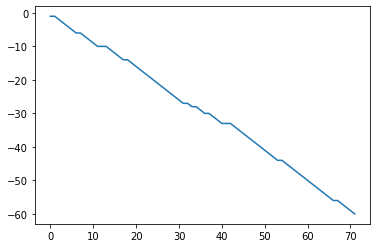

In [270]:
subcat = 'AUTOSTART'
col = 'profit_top3_correct_disorder'
strat = 7

b = balphagore2.bets
b = b[(b['sub_category']==subcat) & (b['final_odds'] < 30) & ((b['strategy']==strat+1)) & (b['declared_player_count']<14)].copy()
b.reset_index(inplace=True, drop=True)
b[col].cumsum().plot()
b[profit_cols].mean()

profit_win                      2.692308
profit_placed                   0.200000
profit_top2_correct             0.000000
profit_top2_correct_disorder   -1.000000
profit_top3_correct             0.000000
profit_top3_correct_disorder   -0.846154
profit_top4_correct            -0.153846
profit_top4_correct_disorder   -0.384615
profit_top2_in_4_correct       -0.615385
dtype: float64

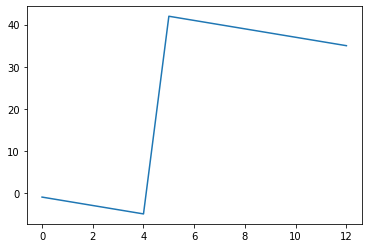

In [314]:
subcat = 'HANDICAP'
col = 'profit_win'
strat = 7

b = balphagore2.bets
b = b[(b['sub_category']==subcat) & (b['b_odds_1'] > 30) & ((b['strategy']==strat+1))].copy()
b.reset_index(inplace=True, drop=True)
b[col].cumsum().plot()
b[profit_cols].mean()

In [316]:
(1/30) * 14

0.4666666666666667